In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc

### Train, Test

In [3]:
train = pd.read_csv('../input/home-credit-default-risk/application_train.csv')
test = pd.read_csv('../input/home-credit-default-risk/application_test.csv')

In [4]:
len(train), len(test)

(307511, 48744)

In [5]:
train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# some custom function to help with EDA

def quality_report(df):
    """Returns the quality of data in terms of missing entries, duplicates and data types"""
    dtype = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total_null = df.isnull().sum().sort_values(ascending=False)
    percent_null = (df.isnull().sum()/len(df) * 100).sort_values(ascending=False)
    
    quality_df = pd.concat([total_null, percent_null, nuniq, dtype], axis=1, keys=['Total_Null', 'Percent_Null', 
                                                                                 'N_Unique', 'Datatype'])
    return quality_df

def categorical_feature_plot(df):
    """Plots a countplot for all categorical features present in the dataframe"""
    cat_features = df.select_dtypes(include='object').columns
    for feature in cat_features:
        plt.figure(figsize=(12,5))
        sns.countplot(x = feature, data=df)
        plt.tight_layout()
    plt.show()

def numeric_distribution_plot(df):
    """Plots a displot for all numeric features present in the dataframe"""
    num_features = df.select_dtypes(exclude='object').columns # int and float are included
    for feature in num_features:
        plt.figure(figsize=(12, 5))
        sns.displot(data=df, x= feature)
    plt.show()

Since the number of columns we have in the dataset is large, we decide not to use the last two functions. 

In [7]:
x = quality_report(train)
x

,Total_Null,Percent_Null,N_Unique,Datatype
COMMONAREA_MEDI,214865,69.872297,3202,float64
COMMONAREA_AVG,214865,69.872297,3181,float64
COMMONAREA_MODE,214865,69.872297,3128,float64
NONLIVINGAPARTMENTS_MODE,213514,69.432963,167,float64
NONLIVINGAPARTMENTS_AVG,213514,69.432963,386,float64
...,...,...,...,...
NAME_HOUSING_TYPE,0,0.000000,6,object
NAME_FAMILY_STATUS,0,0.000000,6,object
NAME_EDUCATION_TYPE,0,0.000000,5,object
NAME_INCOME_TYPE,0,0.000000,8,object


<AxesSubplot:xlabel='TARGET', ylabel='count'>

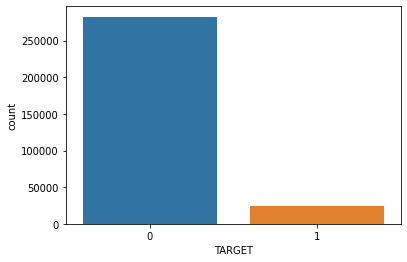

In [8]:
sns.countplot(data=train, x='TARGET')

In [9]:
del x
gc.collect()

24

In [10]:
path = r'./train.csv'
train.to_csv(path, index=False)

path = r'./test.csv'
test.to_csv(path, index=False)

del train, test
gc.collect()

0

### Bureau and Bureau Balance

In [11]:
bureau = pd.read_csv('../input/home-credit-default-risk/bureau.csv')

In [12]:
print(len(bureau))
bureau.head(10)

1716428


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN


In [13]:
bureau = bureau.sort_values(by=['SK_ID_CURR', 'SK_ID_BUREAU'])
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
248484,100001,5896630,Closed,currency 1,-857,0,-492.0,-553.0,NaN,0,112500.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248485,100001,5896631,Closed,currency 1,-909,0,-179.0,-877.0,NaN,0,279720.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248486,100001,5896632,Closed,currency 1,-879,0,-514.0,-544.0,NaN,0,91620.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248487,100001,5896633,Closed,currency 1,-1572,0,-1329.0,-1328.0,NaN,0,85500.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248488,100001,5896634,Active,currency 1,-559,0,902.0,NaN,NaN,0,337680.0,113166.0,0.0,0.0,Consumer credit,-6,4630.5


In [14]:
bureau['CREDIT_ACTIVE'].value_counts()

Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64

In [15]:
# feature engineering based on the bureau dataset

# application count
bur_ncnt = bureau.groupby('SK_ID_CURR')['SK_ID_BUREAU'].count()
bur_active_cnt = bureau.loc[bureau['CREDIT_ACTIVE'] == 'Active'].groupby('SK_ID_CURR')['SK_ID_BUREAU'].count()
bur_closed_cnt = bureau.loc[bureau['CREDIT_ACTIVE'] == 'Closed'].groupby('SK_ID_CURR')['SK_ID_BUREAU'].count()
bur_sold_cnt = bureau.loc[bureau['CREDIT_ACTIVE'] == 'Sold'].groupby('SK_ID_CURR')['SK_ID_BUREAU'].count()
bur_bad_cnt = bureau.loc[bureau['CREDIT_ACTIVE'] == 'Bad debt'].groupby('SK_ID_CURR')['SK_ID_BUREAU'].count()

# amount credit sum
bur_active_total_amt = bureau.loc[bureau['CREDIT_ACTIVE'] == 'Active'].groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].sum()
bur_active_avg_amt = bureau.loc[bureau['CREDIT_ACTIVE'] == 'Active'].groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].mean()

# amount credit sum debt
bur_active_total_debt = bureau.loc[bureau['CREDIT_ACTIVE'] == 'Active'].groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].sum()
bur_active_avg_debt = bureau.loc[bureau['CREDIT_ACTIVE'] == 'Active'].groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].mean()

# amount credit sum limit
bur_active_total_limit = bureau.loc[bureau['CREDIT_ACTIVE'] == 'Active'].groupby('SK_ID_CURR')['AMT_CREDIT_SUM_LIMIT'].sum()
bur_active_avg_limit = bureau.loc[bureau['CREDIT_ACTIVE'] == 'Active'].groupby('SK_ID_CURR')['AMT_CREDIT_SUM_LIMIT'].mean()

# amount credit overdue
bur_active_total_overdue = bureau.loc[bureau['CREDIT_ACTIVE'] == 'Active'].groupby('SK_ID_CURR')['AMT_CREDIT_SUM_OVERDUE'].sum()
bur_active_avg_overdue = bureau.loc[bureau['CREDIT_ACTIVE'] == 'Active'].groupby('SK_ID_CURR')['AMT_CREDIT_SUM_OVERDUE'].mean()

# amount credit max overdue
bur_active_total_maxoverdue = bureau.loc[bureau['CREDIT_ACTIVE'] == 'Active'].groupby('SK_ID_CURR')['AMT_CREDIT_MAX_OVERDUE'].sum()
bur_active_avg_maxoverdue = bureau.loc[bureau['CREDIT_ACTIVE'] == 'Active'].groupby('SK_ID_CURR')['AMT_CREDIT_MAX_OVERDUE'].mean()

# credit prolonged count
bur_total_prolongedcnt = bureau.groupby('SK_ID_CURR')['CNT_CREDIT_PROLONG'].sum()
bur_avg_prolongedcnt = bureau.groupby('SK_ID_CURR')['CNT_CREDIT_PROLONG'].mean()
bur_max_prolongedcnt = bureau.groupby('SK_ID_CURR')['CNT_CREDIT_PROLONG'].max()

# amount annuity
bur_total_annuity = bureau.groupby('SK_ID_CURR')['AMT_ANNUITY'].sum()
bur_avg_annuity = bureau.groupby('SK_ID_CURR')['AMT_ANNUITY'].mean()
bur_active_total_annuity = bureau.loc[bureau.CREDIT_ACTIVE=='Active'].groupby('SK_ID_CURR')['AMT_ANNUITY'].sum()
bur_active_avg_annuity = bureau.loc[bureau.CREDIT_ACTIVE=='Active'].groupby('SK_ID_CURR')['AMT_ANNUITY'].mean()

# let's standardize the days
bureau['ADJ_DAYS'] = (bureau['DAYS_CREDIT'] - bureau['DAYS_CREDIT'].min()) / (bureau['DAYS_CREDIT'].max() - bureau['DAYS_CREDIT'].min()) + 0.5

# application date
bur_rcnt_application = -bureau.groupby('SK_ID_CURR')['DAYS_CREDIT'].max()
bur_earliest_application = -bureau.groupby('SK_ID_CURR')['DAYS_CREDIT'].min()
bur_max_enddate = -bureau.groupby('SK_ID_CURR')['DAYS_CREDIT_ENDDATE'].max()

# application interval
bureau['application_interval'] = bureau.groupby('SK_ID_CURR')['DAYS_CREDIT'].diff(-1)
missing_iter = iter(bureau.groupby('SK_ID_CURR')['DAYS_CREDIT'].max())
bureau_avg_interval = bureau.groupby('SK_ID_CURR')['application_interval'].mean()
bureau.application_interval = bureau.application_interval.map(lambda x: -next(missing_iter) if np.isnan(x) else -x)
bur_sd_interval = bureau.groupby('SK_ID_CURR')['application_interval'].agg('std').fillna(0)

In [16]:
# historical amount
bureau['ADJ_AMT_CREDIT_SUM_DEBT'] = bureau['ADJ_DAYS'] * bureau['AMT_CREDIT_SUM_DEBT']
bur_total_amt_adj = bureau.groupby('SK_ID_CURR')['ADJ_AMT_CREDIT_SUM_DEBT'].sum()
bur_avg_amt_adj = bureau.groupby('SK_ID_CURR')['ADJ_AMT_CREDIT_SUM_DEBT'].mean()

# overdue amount

bureau['ADJ_AMT_CREDIT_MAX_OVERDUE'] = bureau['ADJ_DAYS'] * bureau['AMT_CREDIT_MAX_OVERDUE']
bur_total_credit_max_adj = bureau.groupby('SK_ID_CURR')['ADJ_AMT_CREDIT_MAX_OVERDUE'].sum()
bur_avg_credit_max_adj = bureau.groupby('SK_ID_CURR')['ADJ_AMT_CREDIT_MAX_OVERDUE'].mean()
bur_max_credit_max_adj = bureau.groupby('SK_ID_CURR')['ADJ_AMT_CREDIT_MAX_OVERDUE'].max()

In [17]:
# let's put everything together

bureau_numerical = pd.DataFrame({'bur_count': bur_ncnt, 'bur_active_cnt': bur_active_cnt, 'bur_closed_cnt': bur_closed_cnt, 'bur_bad_cnt': bur_bad_cnt, 
                                 'bur_sold_cnt': bur_sold_cnt, 'bur_active_total_amt': bur_active_total_amt, 'bur_active_avg_amt': bur_active_avg_amt,
                                 'bur_active_total_debt': bur_active_total_debt, 'bur_active_avg_debt': bur_active_avg_debt, 'bur_active_total_limit':bur_active_total_limit, 
                                 'bur_active_avg_limit': bur_active_avg_limit, 'bur_active_total_overdue': bur_active_total_overdue, 'bur_active_avg_overdue': bur_active_avg_overdue, 
                                 'bur_active_avg_overdue': bur_active_avg_overdue, 'bur_active_total_maxoverdue': bur_active_total_maxoverdue, 'bur_active_avg_maxoverdue': bur_active_avg_maxoverdue, 
                                 'bur_total_prolongedcnt': bur_total_prolongedcnt, 'bur_avg_prolongedcnt': bur_avg_prolongedcnt, 'bur_max_prolongedcnt': bur_max_prolongedcnt, 
                                 'bur_total_annuity': bur_total_annuity, 'bur_avg_annuity': bur_avg_annuity, 'bur_active_total_annuity': bur_active_total_annuity, 'bur_active_avg_annuity': bur_active_avg_annuity, 
                                 'bur_rcnt_application': bur_rcnt_application, 'bur_earliest_application': bur_earliest_application, 'bur_max_enddate': bur_max_enddate, 'bureau_avg_interval': bureau_avg_interval, 
                                 'bur_total_amt_adj': bur_total_amt_adj, 'bur_avg_amt_adj': bur_avg_amt_adj, 'bur_total_credit_max_adj': bur_total_credit_max_adj, 'bur_avg_credit_max_adj': bur_avg_credit_max_adj, 
                                 'bur_max_credit_max_adj': bur_max_credit_max_adj }).reset_index()

In [18]:
fillna_0list = ['bur_active_cnt', 'bur_sold_cnt', 'bur_active_total_amt', 'bur_active_avg_amt', 'bur_active_total_debt', 'bur_active_avg_debt', 'bur_active_total_limit', 'bur_active_avg_limit', 
                'bur_active_total_overdue', 'bur_active_avg_overdue', 'bur_active_total_maxoverdue', 'bur_active_avg_maxoverdue', 'bur_bad_cnt']

bureau_numerical[fillna_0list] = bureau_numerical[fillna_0list].fillna(0)

In [19]:
bureau_numerical['bur_active_avg_annuity'] = bureau_numerical['bur_active_avg_annuity'].fillna(bureau_numerical['bur_active_avg_annuity'].mean())
bureau_numerical['bur_active_total_annuity'] = bureau_numerical['bur_active_total_annuity'].fillna(bureau_numerical['bur_active_total_annuity'].mean())

In [20]:
bureau_numerical.head(10)

,SK_ID_CURR,bur_count,bur_active_cnt,bur_closed_cnt,bur_bad_cnt,bur_sold_cnt,bur_active_total_amt,bur_active_avg_amt,bur_active_total_debt,bur_active_avg_debt,...,bur_active_avg_annuity,bur_rcnt_application,bur_earliest_application,bur_max_enddate,bureau_avg_interval,bur_total_amt_adj,bur_avg_amt_adj,bur_total_credit_max_adj,bur_avg_credit_max_adj,bur_max_credit_max_adj
0,100001,7,3.0,4.0,0.0,0.0,884025.000,294675.0000,596686.5,198895.500,...,8272.500000,49,1572,-1778.0,-89.500000,8.550439e+05,122149.131930,0.000000,NaN,NaN
1,100002,8,2.0,6.0,0.0,0.0,481988.565,240994.2825,245781.0,122890.500,...,0.000000,103,1437,-780.0,-134.285714,2.810248e+05,56204.950103,10218.886725,2043.777345,6452.137238
2,100003,4,1.0,3.0,0.0,0.0,810000.000,810000.0000,0.0,0.000,...,18343.700768,606,2586,-1216.0,-660.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
3,100004,2,0.0,2.0,0.0,0.0,0.000,0.0000,0.0,0.000,...,18343.700768,408,1326,382.0,-918.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
4,100005,3,2.0,1.0,0.0,0.0,598626.000,299313.0000,568408.5,284204.250,...,2130.750000,62,373,-1324.0,-155.500000,8.266125e+05,275537.486140,0.000000,0.000000,0.000000
5,100007,1,0.0,1.0,0.0,0.0,0.000,0.0000,0.0,0.000,...,18343.700768,1149,1149,783.0,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000
6,100008,3,1.0,2.0,0.0,0.0,267606.000,267606.0000,240057.0,240057.000,...,18343.700768,78,1097,-471.0,-509.500000,3.536774e+05,117892.469199,0.000000,0.000000,0.000000
7,100009,18,4.0,14.0,0.0,0.0,1527561.000,381890.2500,1077349.5,269337.375,...,18343.700768,239,2882,-1402.0,2.529412,1.481232e+06,105802.257664,0.000000,0.000000,0.000000
8,100010,2,1.0,1.0,0.0,0.0,675000.000,675000.0000,348007.5,348007.500,...,18343.700768,1138,2741,-689.0,1603.000000,3.864765e+05,193238.250770,0.000000,NaN,NaN
9,100011,4,0.0,4.0,0.0,0.0,0.000,0.0000,0.0,0.000,...,18343.700768,1309,2508,860.0,-397.666667,0.000000e+00,0.000000,6511.312885,3255.656443,6511.312885


In [21]:
quality_report(bureau_numerical)

,Total_Null,Percent_Null,N_Unique,Datatype
bur_avg_annuity,187587,61.340828,58097,float64
bur_max_credit_max_adj,92840,30.358620,79684,float64
bur_avg_credit_max_adj,92840,30.358620,80008,float64
bureau_avg_interval,41520,13.577013,42533,float64
bur_closed_cnt,37886,12.388698,56,float64
bur_avg_amt_adj,8372,2.737639,216456,float64
bur_max_enddate,2585,0.845293,13537,float64
bur_avg_prolongedcnt,0,0.000000,111,float64
bur_total_credit_max_adj,0,0.000000,79884,float64
bur_total_amt_adj,0,0.000000,216329,float64


In [22]:
bureau.head(10)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,...,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,ADJ_DAYS,application_interval,ADJ_AMT_CREDIT_SUM_DEBT,ADJ_AMT_CREDIT_MAX_OVERDUE
248484,100001,5896630,Closed,currency 1,-857,0,-492.0,-553.0,NaN,0,...,0.0,0.0,0.0,Consumer credit,-155,0.0,1.206708,-52.0,0.000000,NaN
248485,100001,5896631,Closed,currency 1,-909,0,-179.0,-877.0,NaN,0,...,0.0,0.0,0.0,Consumer credit,-155,0.0,1.188912,30.0,0.000000,NaN
248486,100001,5896632,Closed,currency 1,-879,0,-514.0,-544.0,NaN,0,...,0.0,0.0,0.0,Consumer credit,-155,0.0,1.199179,-693.0,0.000000,NaN
248487,100001,5896633,Closed,currency 1,-1572,0,-1329.0,-1328.0,NaN,0,...,0.0,0.0,0.0,Consumer credit,-155,0.0,0.962012,1013.0,0.000000,NaN
248488,100001,5896634,Active,currency 1,-559,0,902.0,NaN,NaN,0,...,113166.0,0.0,0.0,Consumer credit,-6,4630.5,1.308693,510.0,148099.515400,NaN
248489,100001,5896635,Active,currency 1,-49,0,1778.0,NaN,NaN,0,...,373239.0,0.0,0.0,Consumer credit,-16,10822.5,1.483231,-271.0,553599.529774,NaN
248490,100001,5896636,Active,currency 1,-320,0,411.0,NaN,NaN,0,...,110281.5,NaN,0.0,Consumer credit,-10,9364.5,1.390486,49.0,153344.878337,NaN
1486113,100002,6113835,Closed,currency 1,-1043,0,62.0,-967.0,0.0,0,...,NaN,NaN,0.0,Credit card,-758,0.0,1.143053,1.0,NaN,0.0
1337779,100002,6158903,Active,currency 1,-1042,0,780.0,NaN,NaN,0,...,245781.0,0.0,0.0,Consumer credit,-7,0.0,1.143395,-83.0,281024.750513,NaN
675684,100002,6158904,Closed,currency 1,-1125,0,-1038.0,-1038.0,NaN,0,...,NaN,NaN,0.0,Credit card,-1038,0.0,1.114990,649.0,NaN,NaN


In [23]:
bureau['CREDIT_TYPE'].value_counts()

Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Interbank credit                                      1
Mobile operator loan                                  1
Name: CREDIT_TYPE, dtype: int64

In [24]:
# let's deal with the categorical features

credittype_mapping = {'Consumer credit': 0, 'Credit card': 1, 'Car loan': 2, 'Mortgage': 3, 'Microloan': 4, 'Loan for business development': 5, 
                      'Another type of loan': 6, 'Unknown type of loan': 7, 'Loan for working capital replenishment': 8, 'Cash loan (non-earmarked)': 9, 
                      'Real estate loan': 10, 'Loan for the purchase of equipment': 11, 'Loan for purchase of shares (margin lending)': 12, 'Interbank credit': 13, 
                      'Mobile operator loan': 14}

bureau_categorical = bureau[['SK_ID_CURR', 'SK_ID_BUREAU','CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']]
bureau_categorical['CREDIT_TYPE'] = bureau_categorical['CREDIT_TYPE'].map(credittype_mapping)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [25]:
currency_mapping = {'currency 1': 1, 'currency 2': 2, 'currency 3': 3, 'currency 4': 4}
bureau_categorical['CREDIT_CURRENCY'] = bureau_categorical['CREDIT_CURRENCY'].map(currency_mapping)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
bureau_categorical.head(10)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
248484,100001,5896630,Closed,1,0
248485,100001,5896631,Closed,1,0
248486,100001,5896632,Closed,1,0
248487,100001,5896633,Closed,1,0
248488,100001,5896634,Active,1,0
248489,100001,5896635,Active,1,0
248490,100001,5896636,Active,1,0
1486113,100002,6113835,Closed,1,1
1337779,100002,6158903,Active,1,0
675684,100002,6158904,Closed,1,1


In [27]:
credit_mapping = {'Active': 1, 'Closed': 2, 'Sold': 3, 'Bad debt': 4}
bureau_categorical['CREDIT_ACTIVE'] = bureau_categorical['CREDIT_ACTIVE'].map(credit_mapping)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
bureau_categorical['CREDIT_ACTIVE'].value_counts()

2    1079273
1     630607
3       6527
4         21
Name: CREDIT_ACTIVE, dtype: int64

In [29]:
bureau_categorical = bureau_categorical.groupby('SK_ID_CURR').max().reset_index()
bureau_prepared = pd.merge(bureau_numerical, bureau_categorical, how='inner', on='SK_ID_CURR')

In [30]:
bureau_prepared.head(10)

,SK_ID_CURR,bur_count,bur_active_cnt,bur_closed_cnt,bur_bad_cnt,bur_sold_cnt,bur_active_total_amt,bur_active_avg_amt,bur_active_total_debt,bur_active_avg_debt,...,bureau_avg_interval,bur_total_amt_adj,bur_avg_amt_adj,bur_total_credit_max_adj,bur_avg_credit_max_adj,bur_max_credit_max_adj,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
0,100001,7,3.0,4.0,0.0,0.0,884025.000,294675.0000,596686.5,198895.500,...,-89.500000,8.550439e+05,122149.131930,0.000000,NaN,NaN,5896636,2,1,0
1,100002,8,2.0,6.0,0.0,0.0,481988.565,240994.2825,245781.0,122890.500,...,-134.285714,2.810248e+05,56204.950103,10218.886725,2043.777345,6452.137238,6158909,2,1,1
2,100003,4,1.0,3.0,0.0,0.0,810000.000,810000.0000,0.0,0.000,...,-660.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5885880,2,1,1
3,100004,2,0.0,2.0,0.0,0.0,0.000,0.0000,0.0,0.000,...,-918.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,6829134,2,1,0
4,100005,3,2.0,1.0,0.0,0.0,598626.000,299313.0000,568408.5,284204.250,...,-155.500000,8.266125e+05,275537.486140,0.000000,0.000000,0.000000,6735202,2,1,1
5,100007,1,0.0,1.0,0.0,0.0,0.000,0.0000,0.0,0.000,...,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5987200,2,1,0
6,100008,3,1.0,2.0,0.0,0.0,267606.000,267606.0000,240057.0,240057.000,...,-509.500000,3.536774e+05,117892.469199,0.000000,0.000000,0.000000,6491434,2,1,0
7,100009,18,4.0,14.0,0.0,0.0,1527561.000,381890.2500,1077349.5,269337.375,...,2.529412,1.481232e+06,105802.257664,0.000000,0.000000,0.000000,5651014,2,1,1
8,100010,2,1.0,1.0,0.0,0.0,675000.000,675000.0000,348007.5,348007.500,...,1603.000000,3.864765e+05,193238.250770,0.000000,NaN,NaN,5576632,2,1,5
9,100011,4,0.0,4.0,0.0,0.0,0.000,0.0000,0.0,0.000,...,-397.666667,0.000000e+00,0.000000,6511.312885,3255.656443,6511.312885,5741085,2,1,1


In [31]:
# lets focus on Bureau balance
bureau_balance = pd.read_csv('../input/home-credit-default-risk/bureau_balance.csv')

In [32]:
bureau_balance.shape

(27299925, 3)

In [33]:
bureau_balance.head(10)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


In [34]:
bureau_balance['STATUS_mod'] = bureau_balance['STATUS'].map({'0': 0, '1': 1, '2':2, '3':3, '4': 4, '5': 5, 'X': np.nan, 'C':0}).map(lambda x: 0 if x =='C' else x).interpolate(method='linear')
bureau_balance['write_off'] = bureau_balance['STATUS'].map(lambda x: 1 if x == '5' else 0)
bureau_balance['adj_score'] = (bureau_balance['MONTHS_BALANCE'] - bureau_balance['MONTHS_BALANCE'].min() + 1) * bureau_balance['STATUS_mod']
bb_month_count = bureau_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].count()
bb_dpd_sum = bureau_balance.groupby('SK_ID_BUREAU')['STATUS_mod'].sum()
bb_writeoff = bureau_balance.groupby('SK_ID_BUREAU')['write_off'].sum()
bb_adj_score = bureau_balance.groupby('SK_ID_BUREAU')['adj_score'].sum()
bb_dpd_sum_2_year = bureau_balance.loc[bureau_balance.MONTHS_BALANCE>=-24].groupby('SK_ID_BUREAU')['STATUS_mod'].sum()
bb_write_off_2_year = bureau_balance.loc[bureau_balance.MONTHS_BALANCE>=-24].groupby('SK_ID_BUREAU')['write_off'].sum()
bb_feature = pd.DataFrame({'bb_month_count': bb_month_count, 'bb_dpd_sum': bb_dpd_sum, 'bb_writeoff': bb_writeoff, 
                           'bb_adj_score': bb_adj_score, 'bb_dpd_sum_2_year': bb_dpd_sum_2_year, 'bb_write_off_2_year': bb_write_off_2_year}).reset_index().fillna(0)

In [35]:
del bb_month_count, bb_dpd_sum, bb_writeoff, bb_adj_score, bb_dpd_sum_2_year, bb_write_off_2_year

gc.collect()

63

In [36]:
# let's merge the features engineered from bureau and bureau_balance dataframes together
bureau_bb = bureau[['SK_ID_CURR','SK_ID_BUREAU']].merge(bb_feature, on='SK_ID_BUREAU', how='left')
bb_avg_month = bureau_bb.groupby('SK_ID_CURR')['bb_month_count'].mean()
bb_total_overdue_month = bureau_bb.groupby('SK_ID_CURR')['bb_dpd_sum'].sum()
bb_total_writeoff = bureau_bb.groupby('SK_ID_CURR')['bb_writeoff'].sum()
bb_max_overdue_month = bureau_bb.groupby('SK_ID_CURR')['bb_dpd_sum'].max()
bb_max_writeoff = bureau_bb.groupby('SK_ID_CURR')['bb_dpd_sum'].max()

bb_total_overdue_month_2year = bureau_bb.groupby('SK_ID_CURR')['bb_dpd_sum_2_year'].sum()
bb_max_overdue_month_2year = bureau_bb.groupby('SK_ID_CURR')['bb_dpd_sum_2_year'].max()
bb_total_writeoff_2year = bureau_bb.groupby('SK_ID_CURR')['bb_write_off_2_year'].sum()
bb_max_writeoff_2year = bureau_bb.groupby('SK_ID_CURR')['bb_write_off_2_year'].max()

bb_max_score = bureau_bb.groupby('SK_ID_CURR')['bb_adj_score'].max()
bb_total_score = bureau_bb.groupby('SK_ID_CURR')['bb_adj_score'].sum()
bb_avg_score = bureau_bb.groupby('SK_ID_CURR')['bb_adj_score'].mean()


bureau_bb_feature = pd.DataFrame({'bb_avg_month': bb_avg_month, 'bb_total_overdue_month': bb_total_overdue_month, 'bb_total_writeoff': bb_total_writeoff, 
                                  'bb_max_overdue_month': bb_max_overdue_month,'bb_max_writeoff': bb_max_writeoff,  'bb_total_overdue_month_2year': bb_total_overdue_month_2year, 
                                  'bb_max_overdue_month_2year': bb_max_overdue_month_2year, 'bb_total_writeoff_2year': bb_total_writeoff_2year, 'bb_max_writeoff_2year': bb_max_writeoff_2year, 
                                  'bb_max_score': bb_max_score, 'bb_total_score': bb_total_score, 'bb_avg_score': bb_avg_score}).reset_index()

In [37]:
# let's merge everything together
bureau_feature_prepared = pd.merge(bureau_prepared, bureau_bb_feature, on='SK_ID_CURR', how='left')
bureau_feature_prepared.head(10)

,SK_ID_CURR,bur_count,bur_active_cnt,bur_closed_cnt,bur_bad_cnt,bur_sold_cnt,bur_active_total_amt,bur_active_avg_amt,bur_active_total_debt,bur_active_avg_debt,...,bb_total_writeoff,bb_max_overdue_month,bb_max_writeoff,bb_total_overdue_month_2year,bb_max_overdue_month_2year,bb_total_writeoff_2year,bb_max_writeoff_2year,bb_max_score,bb_total_score,bb_avg_score
0,100001,7,3.0,4.0,0.0,0.0,884025.000,294675.0000,596686.5,198895.500,...,0.0,2.5,2.5,1.0,1.0,0.0,0.0,118.333333,215.333333,30.761905
1,100002,8,2.0,6.0,0.0,0.0,481988.565,240994.2825,245781.0,122890.500,...,0.0,7.0,7.0,11.0,3.0,0.0,0.0,506.000000,2151.000000,268.875000
2,100003,4,1.0,3.0,0.0,0.0,810000.000,810000.0000,0.0,0.000,...,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.000000,NaN
3,100004,2,0.0,2.0,0.0,0.0,0.000,0.0000,0.0,0.000,...,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.000000,NaN
4,100005,3,2.0,1.0,0.0,0.0,598626.000,299313.0000,568408.5,284204.250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
5,100007,1,0.0,1.0,0.0,0.0,0.000,0.0000,0.0,0.000,...,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.000000,NaN
6,100008,3,1.0,2.0,0.0,0.0,267606.000,267606.0000,240057.0,240057.000,...,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.000000,NaN
7,100009,18,4.0,14.0,0.0,0.0,1527561.000,381890.2500,1077349.5,269337.375,...,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.000000,NaN
8,100010,2,1.0,1.0,0.0,0.0,675000.000,675000.0000,348007.5,348007.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
9,100011,4,0.0,4.0,0.0,0.0,0.000,0.0000,0.0,0.000,...,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.000000,NaN


In [38]:
# let's save it to csv to Drive
path = r'./bureau_prepared.csv'
bureau_feature_prepared.to_csv(path, index=False)

In [39]:
del bureau, bureau_numerical, bureau_categorical, bureau_feature_prepared

gc.collect()

24

### POS_CASH_Balance

In [40]:
pos_balance = pd.read_csv('../input/home-credit-default-risk/POS_CASH_balance.csv')
print(len(pos_balance))
pos_balance.shape

10001358


(10001358, 8)

In [41]:
pos_balance.head(10)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
5,2207092,342166,-32,12.0,12.0,Active,0,0
6,1110516,204376,-38,48.0,43.0,Active,0,0
7,1387235,153211,-35,36.0,36.0,Active,0,0
8,1220500,112740,-31,12.0,12.0,Active,0,0
9,2371489,274851,-32,24.0,16.0,Active,0,0


In [42]:
# let's engineer some features
pos_prevcnt = pos_balance.groupby('SK_ID_CURR')['SK_ID_PREV'].count()

# days past due
pos_avg_dpd = pos_balance.groupby('SK_ID_CURR')['SK_DPD'].mean()
pos_max_dpd = pos_balance.groupby('SK_ID_CURR')['SK_DPD'].max()
pos_total_dpd = pos_balance.groupby('SK_ID_CURR')['SK_DPD'].sum()

# cnt instalment
pcb_temp = pos_balance.groupby(['SK_ID_CURR', 'SK_ID_PREV'])['CNT_INSTALMENT'].mean().reset_index()
pos_avg_inst = pcb_temp.groupby('SK_ID_CURR')['CNT_INSTALMENT'].mean()

# CNT_INSTALMENT_FUTURE
pcb_temp = pos_balance.groupby(['SK_ID_CURR', 'SK_ID_PREV'])['CNT_INSTALMENT_FUTURE'].mean().reset_index()
pos_avg_futurinst = pcb_temp.groupby('SK_ID_CURR')['CNT_INSTALMENT_FUTURE'].mean()

In [43]:
pos_features = pd.DataFrame({'pos_prevcnt': pos_prevcnt, 'pos_avg_dpd': pos_avg_dpd, 'pos_max_dpd': pos_max_dpd, 'pos_total_dpd': pos_total_dpd, 
                              'pos_avg_inst': pos_avg_inst, 'pos_avg_futurinst':pos_avg_futurinst})

In [44]:
del pos_balance

gc.collect()

48

In [45]:
path = r'./poscash_prepared.csv'
pos_features.to_csv(path, index=False)

### Previous applications

In [46]:
prev_apps = pd.read_csv('../input/home-credit-default-risk/previous_application.csv')
print(prev_apps.shape)
prev_apps.head(10)

(1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
prev_apps = prev_apps.sort_values(by = ['SK_ID_CURR', 'SK_ID_PREV'])
prev_apps.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
201668,1369693,100001,Consumer loans,3951.000,24835.5,23787.0,2520.0,24835.5,FRIDAY,13,...,Connectivity,8.0,high,POS mobile with interest,365243.0,-1709.0,-1499.0,-1619.0,-1612.0,0.0
892077,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
575941,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
1223745,2396755,100003,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
1021650,2636178,100003,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0


In [48]:
prev_apps['SELLERPLACE_AREA'].head(10)

201668       23
892077      500
575941       -1
1223745     200
1021650    1400
935548       30
1259112      -1
1378978      37
1131133      -1
1232752      -1
Name: SELLERPLACE_AREA, dtype: int64

In [49]:
# application count
pa_prevcnt = prev_apps.groupby('SK_ID_CURR')['SK_ID_PREV'].count()

# amt annuity
pa_avgannuity = prev_apps.groupby('SK_ID_CURR')['AMT_ANNUITY'].mean()
pa_totalannuity = prev_apps.groupby('SK_ID_CURR')['AMT_ANNUITY'].sum()
pa_max_annuity = prev_apps.groupby('SK_ID_CURR')['AMT_ANNUITY'].max()

# amt credit
pa_avgcredit = prev_apps.groupby('SK_ID_CURR')['AMT_CREDIT'].mean()
pa_totalcredit = prev_apps.groupby('SK_ID_CURR')['AMT_CREDIT'].sum()
pa_max_credit = prev_apps.groupby('SK_ID_CURR')['AMT_CREDIT'].max()

# amt application
pa_avgapplied = prev_apps.groupby('SK_ID_CURR')['AMT_APPLICATION'].mean()
pa_totalapplied = prev_apps.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
pa_max_application = prev_apps.groupby('SK_ID_CURR')['AMT_APPLICATION'].max()

# amt application vs amt credit
prev_apps['apps_vs_actual_less'] = (prev_apps['AMT_APPLICATION'] < prev_apps['AMT_CREDIT']).map(lambda x: 1 if x==True else 0)
prev_apps['apps_vs_actual_more'] = (prev_apps['AMT_APPLICATION'] > prev_apps['AMT_CREDIT']).map(lambda x: 1 if x == True else 0)

pa_not_full_credit_times = prev_apps.groupby('SK_ID_CURR')['apps_vs_actual_less'].sum()
pa_not_full_credit_rate = prev_apps.groupby('SK_ID_CURR')['apps_vs_actual_less'].mean()

pa_get_more_credit_times = prev_apps.groupby('SK_ID_CURR')['apps_vs_actual_more'].sum()
pa_get_more_credit_rate = prev_apps.groupby('SK_ID_CURR')['apps_vs_actual_more'].mean()

# diff b/w amt they applied for and they got
prev_apps['applied_diff'] = prev_apps['AMT_APPLICATION'] - prev_apps['AMT_CREDIT']
pa_avgapplieddiff = prev_apps.groupby('SK_ID_CURR')['applied_diff'].mean()
pa_totalapplieddiff = prev_apps.groupby('SK_ID_CURR')['applied_diff'].sum()

# amt downpayment
prev_avgdown = prev_apps.groupby('SK_ID_CURR')['AMT_DOWN_PAYMENT'].mean()
prev_totaldown = prev_apps.groupby('SK_ID_CURR')['AMT_DOWN_PAYMENT'].sum()

# amt goods price
prev_avggoods = prev_apps.groupby('SK_ID_CURR')['AMT_GOODS_PRICE'].mean()
prev_totalgoods = prev_apps.groupby('SK_ID_CURR')['AMT_GOODS_PRICE'].sum()

# adjusted scores
a = prev_apps.DAYS_DECISION - prev_apps.DAYS_DECISION.min() + 1
prev_apps['adj_score'] = (a - a.min())/(a.max() - a.min()) + 0.5
prev_apps['ADJ_ANNUITY'] = prev_apps['adj_score'] * prev_apps['AMT_ANNUITY']
prev_apps['ADJ_APPLICATION'] = prev_apps['adj_score'] * prev_apps['AMT_APPLICATION']
prev_apps['ADJ_CREDIT'] = prev_apps['adj_score'] * prev_apps['AMT_CREDIT']
prev_apps['ADJ_GOODS'] = prev_apps['adj_score'] * prev_apps['AMT_GOODS_PRICE']
prev_apps['ADJ_DOWN'] = prev_apps['adj_score'] * prev_apps['AMT_DOWN_PAYMENT']

# adj annuity
pa_avgadjannuity = prev_apps.groupby('SK_ID_CURR')['ADJ_ANNUITY'].mean()
pa_totaladjannuity = prev_apps.groupby('SK_ID_CURR')['ADJ_ANNUITY'].sum()
pa_max_annuity_adj = prev_apps.groupby('SK_ID_CURR')['ADJ_ANNUITY'].max()

# adj credit
pa_avgadjcredit = prev_apps.groupby('SK_ID_CURR')['ADJ_CREDIT'].mean()
pa_totaladjcredit = prev_apps.groupby('SK_ID_CURR')['ADJ_CREDIT'].sum()
pa_max_credit_adj = prev_apps.groupby('SK_ID_CURR')['ADJ_CREDIT'].max()

# adj application
pa_avgadjapplied = prev_apps.groupby('SK_ID_CURR')['ADJ_APPLICATION'].mean()
pa_totaladjapplied = prev_apps.groupby('SK_ID_CURR')['ADJ_APPLICATION'].sum()
pa_max_application_adj = prev_apps.groupby('SK_ID_CURR')['ADJ_APPLICATION'].max()

# adj downpayment
prev_avgadjdown = prev_apps.groupby('SK_ID_CURR')['ADJ_DOWN'].mean()
prev_totaladjdown = prev_apps.groupby('SK_ID_CURR')['ADJ_DOWN'].sum()

# amt goods price
prev_avgadjgoods = prev_apps.groupby('SK_ID_CURR')['ADJ_GOODS'].mean()
prev_totaladjgoods = prev_apps.groupby('SK_ID_CURR')['ADJ_GOODS'].sum()

In [50]:
# CNT PAYMENT
pa_avgterm = prev_apps.groupby('SK_ID_CURR')['CNT_PAYMENT'].mean()
pa_maxterm = prev_apps.groupby('SK_ID_CURR')['CNT_PAYMENT'].max()
pa_totalterm = prev_apps.groupby('SK_ID_CURR')['CNT_PAYMENT'].sum()

# SELLER AREA
pa_avgseller = prev_apps.groupby('SK_ID_CURR')['SELLERPLACE_AREA'].mean()
pa_maxseller = prev_apps.groupby('SK_ID_CURR')['SELLERPLACE_AREA'].max()
pa_totalseller = prev_apps.groupby('SK_ID_CURR')['SELLERPLACE_AREA'].sum()

# days
pa_first_due = prev_apps.groupby('SK_ID_CURR')['DAYS_FIRST_DUE'].min()
pa_last_due = prev_apps.groupby('SK_ID_CURR')['DAYS_LAST_DUE'].max()
pa_last_termination_day = prev_apps.groupby('SK_ID_CURR')['DAYS_TERMINATION'].max()
pa_last_termination_range = pa_last_termination_day - pa_last_due

# application interval
prev_apps['application_interval'] = prev_apps.groupby('SK_ID_CURR')['DAYS_DECISION'].diff(-1)
missing_iter = iter(prev_apps.groupby('SK_ID_CURR')['DAYS_DECISION'].max())
prev_apps.application_interval = prev_apps.application_interval.map(lambda x: -next(missing_iter) if np.isnan(x) else -x)
pa_avg_intervel = prev_apps.groupby('SK_ID_CURR')['application_interval'].mean()
pa_sd_intervel = prev_apps.groupby('SK_ID_CURR')['application_interval'].agg('std').fillna(0)

# days decision
pa_recentdays_decision = prev_apps.groupby('SK_ID_CURR')['DAYS_DECISION'].max()
pa_earliestdays_decision = prev_apps.groupby('SK_ID_CURR')['DAYS_DECISION'].min()
pa_duration = pa_recentdays_decision - pa_earliestdays_decision

In [51]:
# let's focus on categorical features

# using sklearn OrdinalEncoder for features with too many categorical variables

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
ord_features = ['NAME_CASH_LOAN_PURPOSE', 'WEEKDAY_APPR_PROCESS_START', 'CODE_REJECT_REASON', 'NAME_SELLER_INDUSTRY', 'PRODUCT_COMBINATION', 'NAME_TYPE_SUITE', 
                'NAME_GOODS_CATEGORY', 'CHANNEL_TYPE']

# fill null values
prev_apps[ord_features] = prev_apps[ord_features].fillna('NULL')
ordinal_encoder.fit(prev_apps[ord_features])
prev_apps[ord_features] = ordinal_encoder.transform(prev_apps[ord_features])

In [52]:
# NAME_CASH_LOAN_PURPOSE
pa_max_cash = prev_apps.groupby('SK_ID_CURR')['NAME_CASH_LOAN_PURPOSE'].max()
pa_min_cash = prev_apps.groupby('SK_ID_CURR')['NAME_CASH_LOAN_PURPOSE'].min()

# WEEKDAY_APPR_PROCESS_START
pa_maxapr_process = prev_apps.groupby('SK_ID_CURR')['WEEKDAY_APPR_PROCESS_START'].max()
pa_minapr_process = prev_apps.groupby('SK_ID_CURR')['WEEKDAY_APPR_PROCESS_START'].min()

# CODE_REJECT_REASON
pa_max_reject = prev_apps.groupby('SK_ID_CURR')['CODE_REJECT_REASON'].max()
pa_min_reject = prev_apps.groupby('SK_ID_CURR')['CODE_REJECT_REASON'].min()

# NAME_SELLER_INDUSTRY
pa_max_seller = prev_apps.groupby('SK_ID_CURR')['NAME_SELLER_INDUSTRY'].max()
pa_min_seller = prev_apps.groupby('SK_ID_CURR')['NAME_SELLER_INDUSTRY'].min()

# PRODUCT_COMBINATION
pa_max_product = prev_apps.groupby('SK_ID_CURR')['PRODUCT_COMBINATION'].max()
pa_min_product = prev_apps.groupby('SK_ID_CURR')['PRODUCT_COMBINATION'].min()

# NAME_TYPE_SUITE
pa_max_type = prev_apps.groupby('SK_ID_CURR')['NAME_TYPE_SUITE'].max()
pa_min_type = prev_apps.groupby('SK_ID_CURR')['NAME_TYPE_SUITE'].min()

# NAME_GOODS_CATEGORY
pa_max_goods = prev_apps.groupby('SK_ID_CURR')['NAME_GOODS_CATEGORY'].max()
pa_min_goods = prev_apps.groupby('SK_ID_CURR')['NAME_GOODS_CATEGORY'].min()

# CHANNEL_TYPE
pa_max_channel = prev_apps.groupby('SK_ID_CURR')['CHANNEL_TYPE'].max()
pa_min_channel = prev_apps.groupby('SK_ID_CURR')['CHANNEL_TYPE'].min()

In [53]:
# let's put everything together
prevapps_numerical = pd.DataFrame({'pa_prevcnt': pa_prevcnt, 'pa_avgannuity': pa_avgannuity, 'pa_totalannuity': pa_totalannuity, 'pa_max_annuity': pa_max_annuity, 
                                   'pa_avgcredit': pa_avgcredit, 'pa_max_credit': pa_max_credit, 'pa_avgapplied': pa_avgapplied, 'pa_totalapplied': pa_totalapplied, 
                                   'pa_max_application': pa_max_application, 'pa_not_full_credit_times': pa_not_full_credit_times, 'pa_not_full_credit_rate': pa_not_full_credit_rate, 
                                   'pa_get_more_credit_times':pa_get_more_credit_times, 'pa_get_more_credit_rate': pa_get_more_credit_rate,  'pa_avgapplieddiff': pa_avgapplieddiff, 'pa_totalapplieddiff': pa_totalapplieddiff, 
                                   'prev_avgdown': prev_avgdown, 'prev_totaldown': prev_totaldown, 'prev_avggoods': prev_avggoods, 'prev_totalgoods': prev_totalgoods, 'pa_avgadjannuity': pa_avgadjannuity, 'pa_totaladjannuity': pa_totaladjannuity, 'pa_max_annuity_adj': pa_max_annuity_adj, 
                                   'pa_avgadjcredit': pa_avgadjcredit, 'pa_totaladjcredit': pa_totaladjcredit, 'pa_max_credit_adj': pa_max_credit_adj, 'pa_avgadjapplied': pa_avgadjapplied, 'pa_totaladjapplied': pa_totaladjapplied, 
                                   'pa_max_application_adj': pa_max_application_adj, 'prev_avgadjdown': prev_avgadjdown, 'prev_totaladjdown': prev_totaladjdown, 'prev_avgadjgoods': prev_avgadjgoods, 'prev_totaladjgoods': prev_totaladjgoods, 
                                   'pa_avgterm': pa_avgterm, 'pa_maxterm': pa_maxterm, 'pa_totalterm': pa_totalterm, 'pa_avgseller': pa_avgseller, 'pa_maxseller': pa_maxseller, 'pa_totalseller': pa_totalseller, 'pa_first_due': pa_first_due, 'pa_last_due': pa_last_due, 
                                   'pa_avg_intervel': pa_avg_intervel, 'pa_sd_intervel': pa_sd_intervel, 'pa_recentdays_decision': pa_recentdays_decision, 'pa_earliestdays_decision': pa_earliestdays_decision,
                                   'pa_max_cash': pa_max_cash, 'pa_min_cash': pa_min_cash, 'pa_maxapr_process': pa_maxapr_process, 'pa_minapr_process': pa_minapr_process, 
                                   'pa_max_reject': pa_max_reject, 'pa_min_reject': pa_min_reject, 'pa_max_seller': pa_max_seller, 'pa_min_seller': pa_min_seller, 'pa_max_product': pa_max_product, 'pa_min_product': pa_min_product, 
                                   'pa_max_type': pa_max_type, 'pa_min_type': pa_min_type, 'pa_max_goods': pa_max_goods, 'pa_min_goods': pa_min_goods, 'pa_max_channel': pa_max_channel, 'pa_min_channel': pa_min_channel}).reset_index()

In [54]:
# name contract status
contract_mapping = {'Approved': 1, 'Canceled': 0, 'Refused': 0, 'Unused offer': 0}
prevapps_numerical['NAME_CONTRACT_STATUS'] = prev_apps['NAME_CONTRACT_STATUS'].map(contract_mapping)

In [55]:
prevapps_numerical.head(10)

,SK_ID_CURR,pa_prevcnt,pa_avgannuity,pa_totalannuity,pa_max_annuity,pa_avgcredit,pa_max_credit,pa_avgapplied,pa_totalapplied,pa_max_application,...,pa_min_seller,pa_max_product,pa_min_product,pa_max_type,pa_min_type,pa_max_goods,pa_min_goods,pa_max_channel,pa_min_channel,NAME_CONTRACT_STATUS
0,100001,1,3951.000000,3951.000,3951.000,23787.000000,23787.0,24835.500000,24835.50,24835.5,...,2.0,14.0,14.0,1.0,1.0,19.0,19.0,4.0,4.0,1
1,100002,1,9251.775000,9251.775,9251.775,179055.000000,179055.0,179055.000000,179055.00,179055.0,...,0.0,16.0,16.0,3.0,3.0,25.0,25.0,7.0,7.0,1
2,100003,3,56553.990000,169661.970,98356.995,484191.000000,1035882.0,435436.500000,1306309.50,900000.0,...,4.0,12.0,7.0,7.0,1.0,27.0,7.0,7.0,4.0,1
3,100004,1,5357.250000,5357.250,5357.250,20106.000000,20106.0,24282.000000,24282.00,24282.0,...,2.0,15.0,15.0,7.0,7.0,19.0,19.0,6.0,6.0,1
4,100005,2,4813.200000,4813.200,4813.200,20076.750000,40153.5,22308.750000,44617.50,44617.5,...,2.0,14.0,2.0,3.0,3.0,27.0,19.0,5.0,4.0,0
5,100006,9,23651.175000,141907.050,39954.510,291695.500000,906615.0,272203.260000,2449829.34,688500.0,...,3.0,12.0,0.0,7.0,1.0,27.0,2.0,7.0,4.0,1
6,100007,6,12278.805000,73672.830,22678.785,166638.750000,284400.0,150530.250000,903181.50,247500.0,...,2.0,14.0,3.0,7.0,1.0,27.0,2.0,6.0,0.0,0
7,100008,5,15839.696250,63358.785,25309.575,162767.700000,501975.0,155701.800000,778509.00,450000.0,...,2.0,14.0,2.0,7.0,3.0,27.0,7.0,6.0,4.0,0
8,100009,7,10051.412143,70359.885,17341.605,70137.642857,98239.5,76741.714286,537192.00,110160.0,...,2.0,14.0,10.0,7.0,1.0,22.0,2.0,6.0,4.0,0
9,100010,1,27463.410000,27463.410,27463.410,260811.000000,260811.0,247212.000000,247212.00,247212.0,...,5.0,13.0,13.0,1.0,1.0,11.0,11.0,7.0,7.0,0


In [56]:
# one hot encoding for features with fewer categorical variables

from sklearn.preprocessing import OneHotEncoder
hot_encoder = OneHotEncoder()
hot_features = ['NAME_PAYMENT_TYPE', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CONTRACT_TYPE', 'NAME_YIELD_GROUP', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 
                'NAME_PRODUCT_TYPE']

# fill null values
prev_apps[hot_features] = prev_apps[hot_features].fillna(0)
hot_encoder.fit(prev_apps[hot_features])
prevapps_onehot = hot_encoder.transform(prev_apps[hot_features])

In [57]:
prevapps_onehot.toarray()

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [58]:
hot_encoder.categories_

[array(['Cash through the bank',
        'Cashless from the account of the employer',
        'Non-cash from your account', 'XNA'], dtype=object),
 array(['N', 'Y'], dtype=object),
 array(['Cash loans', 'Consumer loans', 'Revolving loans', 'XNA'],
       dtype=object),
 array(['XNA', 'high', 'low_action', 'low_normal', 'middle'], dtype=object),
 array(['New', 'Refreshed', 'Repeater', 'XNA'], dtype=object),
 array(['Cards', 'Cars', 'Cash', 'POS', 'XNA'], dtype=object),
 array(['XNA', 'walk-in', 'x-sell'], dtype=object)]

In [59]:
df = pd.DataFrame(prevapps_onehot.toarray())

In [60]:
df.rename(columns={0: 'Cash through the bank', 1: 'Cashless from the account of the employer', 2: 'Non-cash from your account', 3: 'XNA_1', 
                   4: 'N', 5: 'Y', 6: 'Cash loans', 7: 'Consumer loans', 8: 'Revolving loans', 9: 'XNA_2', 
                   10:'XNA_3',11:'high', 12: 'low_action', 13: 'low_normal', 14: 'middle', 15: 'New', 16: 'Refreshed', 17: 'Repeater', 18: 'XNA_4', 
                   19: 'Cards', 20: 'Cars', 21: 'Cash', 22: 'POS', 23: 'XNA_5', 24: 'XNA_6', 25: 'walk-in', 26: 'x-sell'}, inplace=True)

In [61]:
df['SK_ID_CURR'] = prev_apps['SK_ID_CURR']

In [62]:
df.head(10)

,Cash through the bank,Cashless from the account of the employer,Non-cash from your account,XNA_1,N,Y,Cash loans,Consumer loans,Revolving loans,XNA_2,...,XNA_4,Cards,Cars,Cash,POS,XNA_5,XNA_6,walk-in,x-sell,SK_ID_CURR
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,271877
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,108129
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,122040
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,176158
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,202054
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,199383
6,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,175704
7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,296299
8,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,342292
9,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,334349


In [63]:
prevapps_categorical = df.groupby('SK_ID_CURR').mean().reset_index()

In [64]:
prevapps_prepared = pd.concat([prevapps_numerical, prevapps_categorical], axis=1)
prevapps_prepared

,SK_ID_CURR,pa_prevcnt,pa_avgannuity,pa_totalannuity,pa_max_annuity,pa_avgcredit,pa_max_credit,pa_avgapplied,pa_totalapplied,pa_max_application,...,Repeater,XNA_4,Cards,Cars,Cash,POS,XNA_5,XNA_6,walk-in,x-sell
0,100001,1,3951.000000,3951.000,3951.000,23787.00,23787.0,24835.500,24835.5,24835.5,...,1.000000,0.0,0.0,0.0,0.000000,1.0,0.000000,1.000000,0.00,0.000000
1,100002,1,9251.775000,9251.775,9251.775,179055.00,179055.0,179055.000,179055.0,179055.0,...,1.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,1.000000,0.00,0.000000
2,100003,3,56553.990000,169661.970,98356.995,484191.00,1035882.0,435436.500,1306309.5,900000.0,...,0.666667,0.0,0.0,0.0,0.333333,0.0,0.666667,0.666667,0.00,0.333333
3,100004,1,5357.250000,5357.250,5357.250,20106.00,20106.0,24282.000,24282.0,24282.0,...,1.000000,0.0,0.0,0.0,0.000000,1.0,0.000000,1.000000,0.00,0.000000
4,100005,2,4813.200000,4813.200,4813.200,20076.75,40153.5,22308.750,44617.5,44617.5,...,0.500000,0.0,0.5,0.0,0.000000,0.0,0.500000,0.500000,0.50,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338852,456251,1,6605.910000,6605.910,6605.910,40455.00,40455.0,40455.000,40455.0,40455.0,...,1.000000,0.0,0.0,0.0,1.000000,0.0,0.000000,0.000000,1.00,0.000000
338853,456252,1,10074.465000,10074.465,10074.465,56821.50,56821.5,57595.500,57595.5,57595.5,...,1.000000,0.0,0.0,0.0,0.000000,1.0,0.000000,1.000000,0.00,0.000000
338854,456253,2,4770.405000,9540.810,5567.715,20625.75,27306.0,24162.750,48325.5,28912.5,...,1.000000,0.0,0.5,0.0,0.000000,0.5,0.000000,0.500000,0.50,0.000000
338855,456254,2,10681.132500,21362.265,19065.825,134439.75,247423.5,121317.750,242635.5,223789.5,...,0.500000,0.0,0.0,0.0,0.500000,0.5,0.000000,0.500000,0.50,0.000000


In [65]:
del prev_apps, df, prevapps_numerical, prevapps_categorical

gc.collect()

24

In [66]:
path = r'./prevapps_prepared.csv'
prevapps_prepared.to_csv(path, index=False)

### Credit Card Balance

In [67]:
credit_balance = pd.read_csv('../input/home-credit-default-risk/credit_card_balance.csv')
credit_balance = credit_balance.sort_values(['SK_ID_CURR', 'SK_ID_PREV', 'MONTHS_BALANCE'])
credit_balance.head(10)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1636141,1489396,100006,-6,0.00,270000,NaN,0.0,NaN,NaN,0.0,...,0.00,0.00,NaN,0,NaN,NaN,0.0,Active,0,0
655566,1489396,100006,-5,0.00,270000,NaN,0.0,NaN,NaN,0.0,...,0.00,0.00,NaN,0,NaN,NaN,0.0,Active,0,0
1399895,1489396,100006,-4,0.00,270000,NaN,0.0,NaN,NaN,0.0,...,0.00,0.00,NaN,0,NaN,NaN,0.0,Active,0,0
1347528,1489396,100006,-3,0.00,270000,NaN,0.0,NaN,NaN,0.0,...,0.00,0.00,NaN,0,NaN,NaN,0.0,Active,0,0
520387,1489396,100006,-2,0.00,270000,NaN,0.0,NaN,NaN,0.0,...,0.00,0.00,NaN,0,NaN,NaN,0.0,Active,0,0
584804,1489396,100006,-1,0.00,270000,NaN,0.0,NaN,NaN,0.0,...,0.00,0.00,NaN,0,NaN,NaN,0.0,Active,0,0
3131464,1843384,100011,-75,189000.00,180000,180000.0,180000.0,0.0,0.0,NaN,...,189000.00,189000.00,4.0,4,0.0,0.0,NaN,Active,0,0
2447092,1843384,100011,-74,184568.85,180000,0.0,0.0,0.0,0.0,9000.0,...,184568.85,184568.85,0.0,0,0.0,0.0,1.0,Active,0,0
2353190,1843384,100011,-73,181044.54,180000,0.0,0.0,0.0,0.0,9000.0,...,181044.54,181044.54,0.0,0,0.0,0.0,2.0,Active,0,0
1086495,1843384,100011,-72,177544.35,180000,0.0,0.0,0.0,0.0,9000.0,...,177544.35,177544.35,0.0,0,0.0,0.0,3.0,Active,0,0


In [68]:
len(credit_balance)

3840312

In [69]:
# some feature engineering

# prevcounts
prevcounts = credit_balance.groupby('SK_ID_CURR')['SK_ID_PREV'].nunique()

# AMT BALANCE
cb_avg_balance = credit_balance.groupby('SK_ID_CURR')['SK_ID_PREV'].mean()
cb_max_balance = credit_balance.groupby('SK_ID_CURR')['SK_ID_PREV'].max()

# AMT_CREDIT_LIMIT_ACTUAL
cb_avg_actuallimit = credit_balance.groupby('SK_ID_CURR')['AMT_CREDIT_LIMIT_ACTUAL'].mean()
cb_max_actuallimit = credit_balance.groupby('SK_ID_CURR')['AMT_CREDIT_LIMIT_ACTUAL'].max()
cb_total_actuallimit = credit_balance.groupby('SK_ID_CURR')['AMT_CREDIT_LIMIT_ACTUAL'].sum()

# drawing in 1 year
cb_temp = credit_balance.loc[credit_balance['MONTHS_BALANCE'] >= -12]
cb_drawing_amt_1year = cb_temp.groupby('SK_ID_CURR')['AMT_DRAWINGS_CURRENT'].sum()
cb_cntdrawing_1year = cb_temp.groupby('SK_ID_CURR')['CNT_DRAWINGS_CURRENT'].sum()

# drawing in 6 months
cb_temp = credit_balance.loc[credit_balance['MONTHS_BALANCE'] >= -6]
cb_drawing_amt_6m = cb_temp.groupby('SK_ID_CURR')['AMT_DRAWINGS_CURRENT'].sum()
cb_cntdrawing_6m = cb_temp.groupby('SK_ID_CURR')['CNT_DRAWINGS_CURRENT'].sum()

# average drawing amt
cb_temp = credit_balance.loc[credit_balance.CNT_DRAWINGS_CURRENT>0].groupby(['SK_ID_CURR','MONTHS_BALANCE'])['AMT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_CURRENT'].sum().reset_index()
cb_temp['avg_drawing_amount'] = (cb_temp.AMT_DRAWINGS_CURRENT / cb_temp.CNT_DRAWINGS_CURRENT).fillna(0)
cb_avg_drawing_amount = cb_temp.groupby('SK_ID_CURR')['avg_drawing_amount'].mean().fillna(0)

cb_count_rej = credit_balance.groupby(['SK_ID_CURR'])['NAME_CONTRACT_STATUS'].agg(lambda x: np.sum(x=='Refused'))

# current month card situation
last_month = credit_balance.groupby(['SK_ID_CURR', 'SK_ID_PREV'])['MONTHS_BALANCE'].max().reset_index()
last_month = last_month.merge(credit_balance, on=['SK_ID_CURR','SK_ID_PREV', 'MONTHS_BALANCE'])

cb_cur_total_receivable = last_month.groupby('SK_ID_CURR')['AMT_TOTAL_RECEIVABLE'].sum()
cb_cur_total_limit = last_month.loc[last_month['NAME_CONTRACT_STATUS'] == 'Active'].groupby('SK_ID_CURR')['AMT_CREDIT_LIMIT_ACTUAL'].sum()
cb_total_payment = last_month.groupby('SK_ID_CURR')['AMT_INST_MIN_REGULARITY'].sum()
cb_cur_total_balance = last_month.groupby('SK_ID_CURR')['AMT_BALANCE'].sum()

# INSTALMENTS
credit_balance['PAY_MONTH'] = credit_balance.CNT_INSTALMENT_MATURE_CUM.map(lambda x: 1 if x > 0 else 0)
cb_temp = credit_balance.groupby(['SK_ID_CURR','SK_ID_PREV'])['PAY_MONTH'].sum().reset_index()
cb_avg_inst_card = cb_temp.groupby('SK_ID_CURR')['PAY_MONTH'].mean()
cb_total_inst_card = cb_temp.groupby('SK_ID_CURR')['PAY_MONTH'].sum()

# DPD
cb_temp = credit_balance[['SK_ID_CURR', 'SK_ID_PREV', 'SK_DPD', 'SK_DPD_DEF']].groupby(['SK_ID_CURR','SK_ID_PREV'])['SK_DPD','SK_DPD_DEF'].max().reset_index()
cb_max_dpd_days = cb_temp.groupby('SK_ID_CURR')['SK_DPD'].max()
cb_total_dpd_days = cb_temp.groupby('SK_ID_CURR')['SK_DPD'].sum()
cb_max_largedpd_days = cb_temp.groupby('SK_ID_CURR')['SK_DPD_DEF'].max()
cb_total_largedpd_days = cb_temp.groupby('SK_ID_CURR')['SK_DPD_DEF'].sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:48: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [70]:
credit_df = pd.DataFrame({'prevcounts': prevcounts, 'cb_avg_balance': cb_avg_balance, 'cb_max_balance': cb_max_balance, 'cb_avg_actuallimit': cb_avg_actuallimit, 
                          'cb_max_actuallimit': cb_max_actuallimit, 'cb_total_actuallimit': cb_total_actuallimit, 'cb_drawing_amt_1year': cb_drawing_amt_1year, 
                          'cb_cntdrawing_1year': cb_cntdrawing_1year, 'cb_drawing_amt_6m': cb_drawing_amt_6m, 'cb_cntdrawing_6m': cb_cntdrawing_6m, 'cb_avg_drawing_amount': cb_avg_drawing_amount, 
                          'cb_count_rej': cb_count_rej, 'cb_cur_total_receivable': cb_cur_total_receivable, 'cb_cur_total_limit': cb_cur_total_limit, 'cb_total_payment': cb_total_payment, 
                          'cb_cur_total_balance': cb_cur_total_balance, 'cb_avg_inst_card': cb_avg_inst_card, 'cb_total_inst_card': cb_total_inst_card, 'cb_max_dpd_days': cb_max_dpd_days, 
                          'cb_total_dpd_days': cb_total_dpd_days, 'cb_max_largedpd_days': cb_max_largedpd_days, 'cb_total_largedpd_days': cb_total_largedpd_days}).reset_index()

In [71]:
credit_df.head(10)

,SK_ID_CURR,prevcounts,cb_avg_balance,cb_max_balance,cb_avg_actuallimit,cb_max_actuallimit,cb_total_actuallimit,cb_drawing_amt_1year,cb_cntdrawing_1year,cb_drawing_amt_6m,...,cb_cur_total_receivable,cb_cur_total_limit,cb_total_payment,cb_cur_total_balance,cb_avg_inst_card,cb_total_inst_card,cb_max_dpd_days,cb_total_dpd_days,cb_max_largedpd_days,cb_total_largedpd_days
0,100006,1,1489396.0,1489396,270000.000000,270000,1620000,0.00,0,0.000,...,0.000,270000.0,0.0,0.000,0.0,0,0,0,0,0
1,100011,1,1843384.0,1843384,164189.189189,180000,12150000,0.00,0,0.000,...,0.000,90000.0,0.0,0.000,73.0,73,0,0,0,0
2,100013,1,2038692.0,2038692,131718.750000,157500,12645000,0.00,0,0.000,...,0.000,45000.0,0.0,0.000,89.0,89,1,1,1,1
3,100021,1,2594025.0,2594025,675000.000000,675000,11475000,0.00,0,0.000,...,0.000,NaN,0.0,0.000,0.0,0,0,0,0,0
4,100023,1,1499902.0,1499902,135000.000000,225000,1080000,0.00,0,0.000,...,0.000,225000.0,0.0,0.000,0.0,0,0,0,0,0
5,100028,1,1914954.0,1914954,225000.000000,225000,11025000,98374.95,43,57700.665,...,36980.415,225000.0,11250.0,37335.915,42.0,42,0,0,0,0
6,100036,1,2621538.0,2621538,78750.000000,90000,945000,0.00,0,0.000,...,0.000,90000.0,0.0,0.000,0.0,0,0,0,0,0
7,100042,1,2137382.0,2137382,78750.000000,90000,6615000,0.00,0,0.000,...,0.000,45000.0,0.0,0.000,83.0,83,1,1,0,0
8,100043,1,1557583.0,1557583,287045.454545,427500,9472500,0.00,0,0.000,...,0.000,22500.0,0.0,0.000,31.0,31,0,0,0,0
9,100047,1,1472630.0,1472630,326250.000000,450000,11745000,0.00,0,0.000,...,0.000,45000.0,0.0,0.000,0.0,0,0,0,0,0


In [72]:
path = r'./credit_card_prepared.csv'
credit_df.to_csv(path, index=False)

In [73]:
del credit_balance

gc.collect()

96

### Instalment Payments

In [74]:
instal_payments = pd.read_csv('../input/home-credit-default-risk/installments_payments.csv')
instal_payments.head(10)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
5,1137312,164489,1.0,12,-1384.0,-1417.0,5970.375,5970.375
6,2234264,184693,4.0,11,-349.0,-352.0,29432.295,29432.295
7,1818599,111420,2.0,4,-968.0,-994.0,17862.165,17862.165
8,2723183,112102,0.0,14,-197.0,-197.0,70.740,70.740
9,1413990,109741,1.0,4,-570.0,-609.0,14308.470,14308.470


In [75]:
len(instal_payments)

13605401

In [76]:
instal_payments = instal_payments.sort_values(['SK_ID_CURR', 'SK_ID_PREV', 'NUM_INSTALMENT_NUMBER'])

In [77]:
instal_payments.head(10)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
1478621,1369693,100001,1.0,1,-1709.0,-1715.0,3951.000,3951.000
2568722,1369693,100001,1.0,2,-1679.0,-1715.0,3951.000,3951.000
3458712,1369693,100001,1.0,3,-1649.0,-1660.0,3951.000,3951.000
2624024,1369693,100001,2.0,4,-1619.0,-1628.0,17397.900,17397.900
1761012,1851984,100001,1.0,2,-2916.0,-2916.0,3982.050,3982.050
3774071,1851984,100001,1.0,3,-2886.0,-2875.0,3982.050,3982.050
3435373,1851984,100001,1.0,4,-2856.0,-2856.0,3980.925,3980.925
2144879,1038818,100002,1.0,1,-565.0,-587.0,9251.775,9251.775
2163032,1038818,100002,1.0,2,-535.0,-562.0,9251.775,9251.775
1675768,1038818,100002,1.0,3,-505.0,-529.0,9251.775,9251.775


In [78]:
# let's do some feature engineering

# recent application
recent_record = instal_payments.merge(instal_payments.groupby('SK_ID_CURR')['SK_ID_PREV'].max().reset_index().drop('SK_ID_CURR', axis=1), on='SK_ID_PREV')
ip_recent_term = recent_record.groupby('SK_ID_CURR')['NUM_INSTALMENT_NUMBER'].max()
ip_recent_total_actual_payment = recent_record.groupby('SK_ID_CURR')['AMT_PAYMENT'].sum()
ip_recent_total_required_payment = recent_record.groupby('SK_ID_CURR')['AMT_INSTALMENT'].sum()
ip_avgrecent_instalment = recent_record.groupby('SK_ID_CURR')['AMT_INSTALMENT'].mean()
ip_avgrecent_payment = recent_record.groupby('SK_ID_CURR')['AMT_PAYMENT'].mean()

# is late/paid less
recent_record['is_late'] = (recent_record.DAYS_INSTALMENT < recent_record.DAYS_ENTRY_PAYMENT).map(lambda x: 1 if x==True else 0).fillna(0)
recent_record['is_less'] = (recent_record.AMT_INSTALMENT > recent_record.AMT_PAYMENT).map(lambda x: 1 if x==True else 0).fillna(0)
ip_recent_total_late_times = recent_record.groupby('SK_ID_CURR')['is_late'].sum()
ip_recent_total_less_times = recent_record.groupby('SK_ID_CURR')['is_less'].sum()


# didnt fully pay instalment
ip_temp1 = recent_record.loc[recent_record.is_late==1]
ip_temp2 = recent_record.loc[recent_record.is_less==1]
ip_temp1['total_late'] = ip_temp1.DAYS_ENTRY_PAYMENT - ip_temp1.DAYS_INSTALMENT
ip_temp2['total_less'] = ip_temp2.AMT_INSTALMENT - ip_temp2.AMT_PAYMENT
ip_recent_total_late_days = ip_temp1.groupby('SK_ID_CURR')['total_late'].sum()
ip_recent_total_less_amount = ip_temp2.groupby('SK_ID_CURR')['total_less'].sum()
del ip_temp1, ip_temp2
gc.collect()

# total late & less time 
instal_payments['is_late'] = (instal_payments.DAYS_INSTALMENT < instal_payments.DAYS_ENTRY_PAYMENT).map(lambda x: 1 if x==True else 0).fillna(0)
instal_payments['is_less'] = (instal_payments.AMT_INSTALMENT > instal_payments.AMT_PAYMENT).map(lambda x: 1 if x==True else 0).fillna(0)
ip_total_late_times = instal_payments.groupby('SK_ID_CURR')['is_late'].sum()
ip_total_less_times = instal_payments.groupby('SK_ID_CURR')['is_less'].sum()

# total late & less amount
ip_temp1 = instal_payments.loc[instal_payments.is_late==1]
ip_temp2 = instal_payments.loc[instal_payments.is_less==1]
ip_temp1['total_late'] = ip_temp1.DAYS_ENTRY_PAYMENT - ip_temp1.DAYS_INSTALMENT
ip_temp2['total_less'] = ip_temp2.AMT_INSTALMENT - ip_temp2.AMT_PAYMENT
ip_total_late_days = ip_temp1.groupby('SK_ID_CURR')['total_late'].sum()
ip_total_less_amount = ip_temp2.groupby('SK_ID_CURR')['total_less'].sum()
del ip_temp1, ip_temp2
gc.collect()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

0

In [79]:
# prev application
# total and avg payment
ip_avg_payment = instal_payments.groupby('SK_ID_CURR')['AMT_PAYMENT'].mean()
ip_total_payment = instal_payments.groupby('SK_ID_CURR')['AMT_PAYMENT'].sum()
ip_avg_instalment = instal_payments.groupby('SK_ID_CURR')['AMT_INSTALMENT'].mean()
ip_total_instalment = instal_payments.groupby('SK_ID_CURR')['AMT_INSTALMENT'].sum()

prev_count = instal_payments.groupby('SK_ID_CURR')['SK_ID_PREV'].nunique()
payment_count = instal_payments.groupby('SK_ID_CURR')['SK_ID_PREV'].count()

# credit card
instal_payments['IS_CREDIT'] = instal_payments.NUM_INSTALMENT_VERSION.map(lambda x: 1 if x==0 else 0)
ip_creditcard_user = instal_payments.groupby('SK_ID_CURR')['IS_CREDIT'].sum().map(lambda x: 1 if x>0 else 0)
ip_creditcard_count = instal_payments.groupby(['SK_ID_CURR','SK_ID_PREV'])['IS_CREDIT'].sum().map(lambda x: 1 if x>0 else 0).reset_index().groupby('SK_ID_CURR')['IS_CREDIT'].sum()

# change times
ip_temp = (instal_payments.groupby(['SK_ID_CURR','SK_ID_PREV'])['NUM_INSTALMENT_VERSION'].nunique()-1).reset_index()
ip_total_change_times = ip_temp.groupby('SK_ID_CURR')['NUM_INSTALMENT_VERSION'].sum()
ip_avg_change_times = ip_temp.groupby('SK_ID_CURR')['NUM_INSTALMENT_VERSION'].mean()

# avg instalment 1 yr
ip_temp = instal_payments.groupby(['SK_ID_CURR', 'SK_ID_PREV'])['NUM_INSTALMENT_NUMBER'].max().reset_index()
ip_avg_instl = ip_temp.groupby('SK_ID_CURR')['NUM_INSTALMENT_NUMBER'].mean()
ip_max_instl = ip_temp.groupby('SK_ID_CURR')['NUM_INSTALMENT_NUMBER'].max()



In [80]:
instal_features = pd.DataFrame({'prev_count': prev_count, 'payment_count': payment_count, 'ip_recent_term': ip_recent_term, 'ip_recent_total_actual_payment': ip_recent_total_actual_payment, 'ip_recent_total_required_payment': ip_recent_total_required_payment, 
                                'ip_avgrecent_instalment': ip_avgrecent_instalment, 'ip_avgrecent_payment': ip_avgrecent_payment, 'ip_recent_total_late_times': ip_recent_total_late_times, 
                                'ip_recent_total_less_times': ip_recent_total_less_times, 'ip_total_late_days': ip_total_late_days, 'ip_total_less_amount': ip_total_less_amount, 'ip_avg_payment': ip_avg_payment, 
                                'ip_total_payment': ip_total_payment, 'ip_avg_instalment': ip_avg_instalment, 'ip_total_instalment': ip_total_instalment, 'ip_creditcard_user': ip_creditcard_user, 'ip_creditcard_count': ip_creditcard_count, 
                                'ip_total_change_times': ip_total_change_times, 'ip_avg_change_times': ip_avg_change_times, 'ip_avg_instl': ip_avg_instl, 'ip_max_instl': ip_max_instl}).reset_index()

In [81]:
instal_features.head(10)

,SK_ID_CURR,prev_count,payment_count,ip_recent_term,ip_recent_total_actual_payment,ip_recent_total_required_payment,ip_avgrecent_instalment,ip_avgrecent_payment,ip_recent_total_late_times,ip_recent_total_less_times,...,ip_avg_payment,ip_total_payment,ip_avg_instalment,ip_total_instalment,ip_creditcard_user,ip_creditcard_count,ip_total_change_times,ip_avg_change_times,ip_avg_instl,ip_max_instl
0,100001,2,7,4,11945.025,11945.025,3981.675000,3981.675000,1,0,...,5885.132143,41195.925,5885.132143,41195.925,0,0,1,0.500000,4.000000,4
1,100002,1,19,19,219625.695,219625.695,11559.247105,11559.247105,0,0,...,11559.247105,219625.695,11559.247105,219625.695,0,0,1,1.000000,19.000000,19
2,100003,3,25,6,387113.940,387113.940,64518.990000,64518.990000,0,0,...,64754.586000,1618864.650,64754.586000,1618864.650,0,0,1,0.333333,8.333333,12
3,100004,1,3,3,21288.465,21288.465,7096.155000,7096.155000,0,0,...,7096.155000,21288.465,7096.155000,21288.465,0,0,1,1.000000,3.000000,3
4,100005,1,9,9,56161.845,56161.845,6240.205000,6240.205000,1,0,...,6240.205000,56161.845,6240.205000,56161.845,0,0,1,1.000000,9.000000,9
5,100006,3,16,5,25091.325,25091.325,5018.265000,5018.265000,0,0,...,62947.088438,1007153.415,62947.088438,1007153.415,0,0,1,0.333333,5.333333,10
6,100007,5,66,12,43193.880,50372.460,3598.032857,3085.277143,4,4,...,12214.060227,806127.975,12666.444545,835985.340,0,0,1,0.200000,12.600000,17
7,100008,4,35,8,609385.320,609385.320,76173.165000,76173.165000,0,0,...,27360.502714,957617.595,27702.964286,969603.750,0,0,1,0.250000,8.500000,10
8,100009,8,51,1,10418.670,10418.670,10418.670000,10418.670000,0,0,...,9568.531765,487995.120,9568.531765,487995.120,0,0,0,0.000000,6.500000,12
9,100010,1,10,10,274492.080,274492.080,27449.208000,27449.208000,0,0,...,27449.208000,274492.080,27449.208000,274492.080,0,0,0,0.000000,10.000000,10


In [82]:
path = r'./instal_payments_prepared.csv'
instal_features.to_csv(path, index=False)

In [83]:
del instal_features, instal_payments

gc.collect()

96